# import libraries

In [75]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Load the wine dataset into a DataFrame and print info

In [2]:
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

wine_df.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


In [3]:
# Display the shape of the DataFrame
print("Shape of the Wine DataFrame:", wine_df.shape)

Shape of the Wine DataFrame: (178, 14)


# train KNN

In [4]:
# create train and test dataset by splitting original dataset
X = wine_df.drop(columns=['target'], axis=1)
y = wine_df['target']

X_train, X_test, \
    y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.3, 
                                   stratify=y,
                                   shuffle=True)

print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print("*" * 10)
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (124, 13)
y_train.shape: (124,)
**********
X_test.shape: (54, 13)
y_test.shape: (54,)


In [78]:
# train knn with k=3
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

# calculate score on train dataset
training_score = clf.score(X_train, y_train)
print(f"training_score: {training_score}")

training_score: 0.8790322580645161


In [79]:
# calculate test score
test_score = clf.score(X_test, y_test)
print(f"test_score: {test_score}")

test_score: 0.6111111111111112


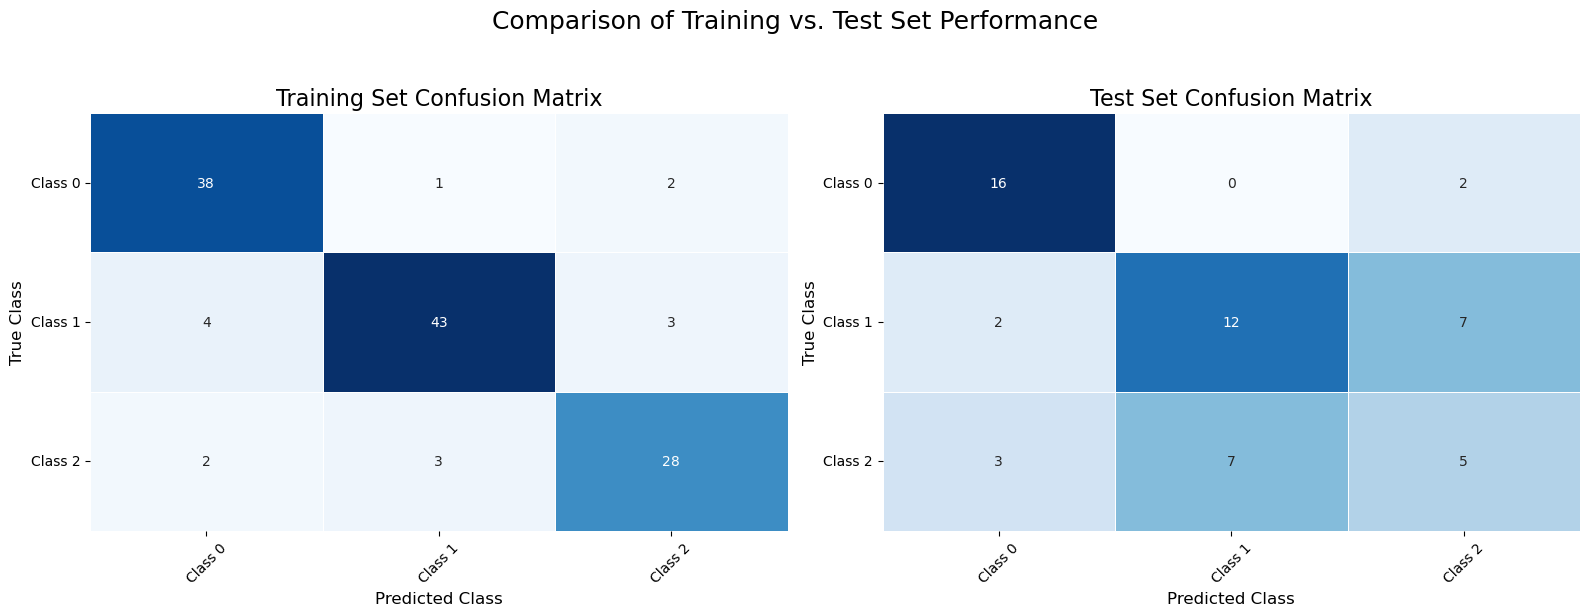

In [81]:
def plot_conf_matrices(X_train, X_test, model):
    # Get predictions for the training set
    y_train_pred = model.predict(X_train)
    # Get predictions for the test set
    y_test_pred = model.predict(X_test)

    # --- 3. Calculate Confusion Matrices ---
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Define labels for the axes
    class_labels = [f'Class {i}' for i in model.classes_]

    # --- 4. Plot Side-by-Side ---
    # Create a figure with 1 row and 2 columns (for the two matrices)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Adjust figsize as needed

    # --- Plot 1: Training Confusion Matrix ---
    sns.heatmap(
        cm_train, 
        annot=True,              # Annotate cells with counts
        fmt='d',                 # Format annotations as integers
        cmap='Blues',            # Color map
        cbar=False,              # No separate color bar needed
        linewidths=0.5,          # Lines between cells
        xticklabels=class_labels,
        yticklabels=class_labels,
        ax=axes[0]               # Plot on the first subplot
    )
    axes[0].set_title('Training Set Confusion Matrix', fontsize=16)
    axes[0].set_ylabel('True Class', fontsize=12)
    axes[0].set_xlabel('Predicted Class', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].tick_params(axis='y', rotation=0)


    # --- Plot 2: Test Confusion Matrix ---
    sns.heatmap(
        cm_test, 
        annot=True, 
        fmt='d', 
        cmap='Blues', 
        cbar=False, 
        linewidths=0.5, 
        xticklabels=class_labels,
        yticklabels=class_labels,
        ax=axes[1]               # Plot on the second subplot
    )
    axes[1].set_title('Test Set Confusion Matrix', fontsize=16)
    axes[1].set_ylabel('True Class', fontsize=12)
    axes[1].set_xlabel('Predicted Class', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='y', rotation=0)


    plt.suptitle('Comparison of Training vs. Test Set Performance', fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.show()

plot_conf_matrices(X_train, X_test, clf)

# dimension reduction using PCA

In [82]:
# make data standard
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply pca
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"X_train_pca.shape: {X_train_pca.shape}")
print(f"X_test_pca.shape: {X_test_pca.shape}")

X_train_pca.shape: (124, 2)
X_test_pca.shape: (54, 2)


In [83]:
# train knn model using transformed dataset
# train knn with k=3
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train_pca, y_train)

# calculate score on train dataset
training_score = clf.score(X_train_pca, y_train)
print(f"training_score: {training_score}")

training_score: 0.967741935483871


In [84]:
# calculate test score
test_score = clf.score(X_test_pca, y_test)
print(f"test_score: {test_score}")

test_score: 0.9444444444444444


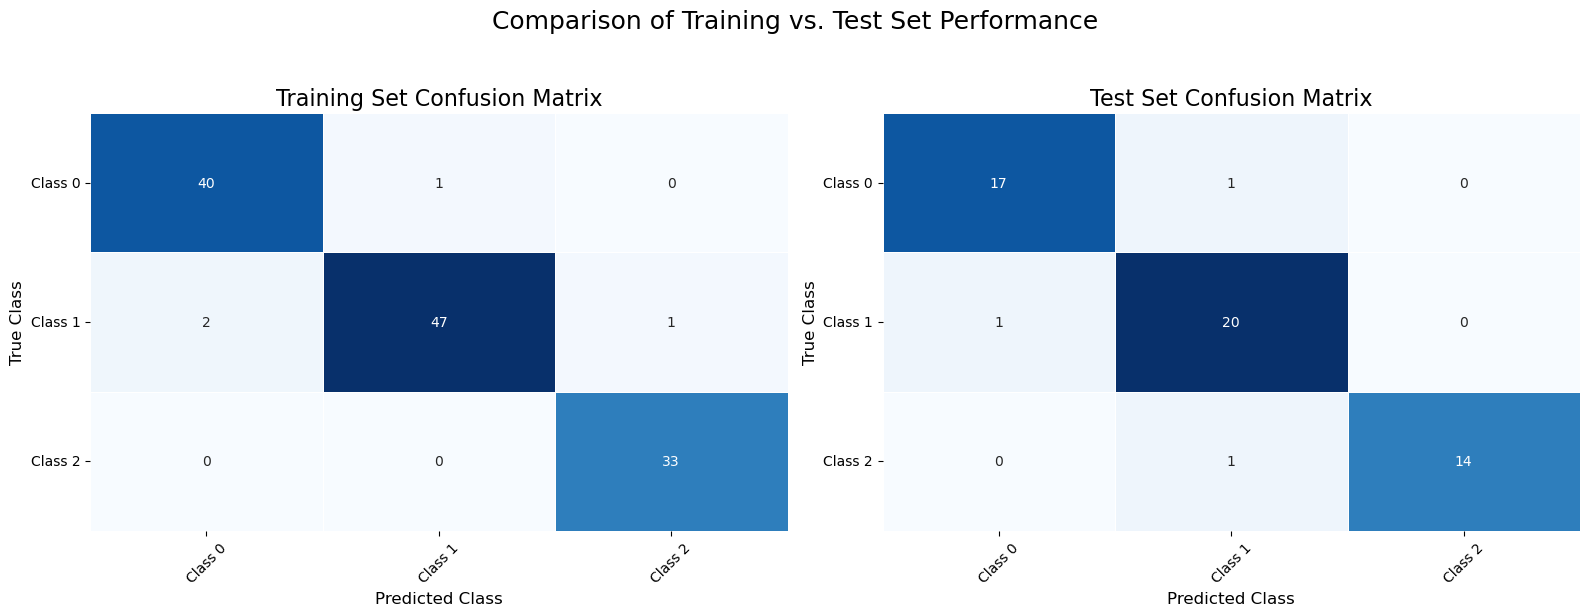

In [86]:
plot_conf_matrices(X_train_pca, X_test_pca, clf)

# rule based prediction

In [10]:
def predict(X):
    if X['alcohol'] < 12:
        return 0
    elif X['alcohol'] >= 12 and X['alcohol'] < 13:
        return 1
    else:
        return 2

In [14]:
y_train_pred = X_train.apply(predict, axis=1)
y_test_pred = X_test.apply(predict, axis=1)

In [16]:
print(f"train_score: {np.mean(y_train == y_train_pred)}")
print(f"test_score: {np.mean(y_test == y_test_pred)}")

train_score: 0.3870967741935484
test_score: 0.42592592592592593


# train linear regression

In [18]:
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [87]:
def score(clf, X, y, threshold):
    y_pred = clf.predict(X)
    y_pred = np.where(y_pred < threshold, 0, y_pred)
    y_pred = np.where((y_pred >= threshold) & (y_pred < threshold * 2), 1, y_pred)
    y_pred = np.where(y_pred >= threshold * 2, 2, y_pred)
    return y_pred, np.mean(y_pred == y)

# train different thresholds

In [ ]:
for threshold in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [88]:
train_scores = []
test_scores = []
thresholds = np.linspace(0, 2, 20)
for threshold in thresholds:
    print(f"calculating score for threshold: {threshold}")
    train_scores.append(score(regr, X_train, y_train, threshold)[1])
    test_scores.append(score(regr, X_test, y_test, threshold)[1])

calculating score for threshold: 0.0
calculating score for threshold: 0.10526315789473684
calculating score for threshold: 0.21052631578947367
calculating score for threshold: 0.3157894736842105
calculating score for threshold: 0.42105263157894735
calculating score for threshold: 0.5263157894736842
calculating score for threshold: 0.631578947368421
calculating score for threshold: 0.7368421052631579
calculating score for threshold: 0.8421052631578947
calculating score for threshold: 0.9473684210526315
calculating score for threshold: 1.0526315789473684
calculating score for threshold: 1.1578947368421053
calculating score for threshold: 1.263157894736842
calculating score for threshold: 1.3684210526315788
calculating score for threshold: 1.4736842105263157
calculating score for threshold: 1.5789473684210527
calculating score for threshold: 1.6842105263157894
calculating score for threshold: 1.789473684210526
calculating score for threshold: 1.894736842105263
calculating score for thresh

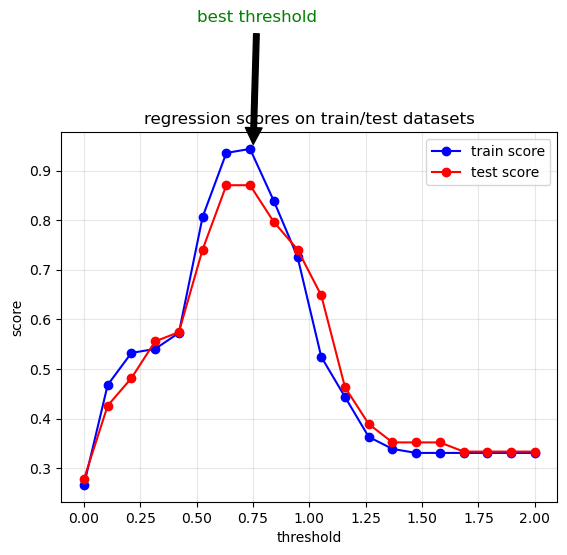

In [89]:
plt.plot(thresholds, train_scores, 'bo-', label='train score')
plt.plot(thresholds, test_scores, 'ro-', label='test score')
plt.annotate(
    'best threshold',                
    xy=(0.75, .94),             
    xytext=(0.5, 1.2),                 
    arrowprops=dict(facecolor='black', shrink=0.05), 
    fontsize=12,
    color='green'
)
plt.title("regression scores on train/test datasets")
plt.ylabel("score")
plt.xlabel("threshold")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

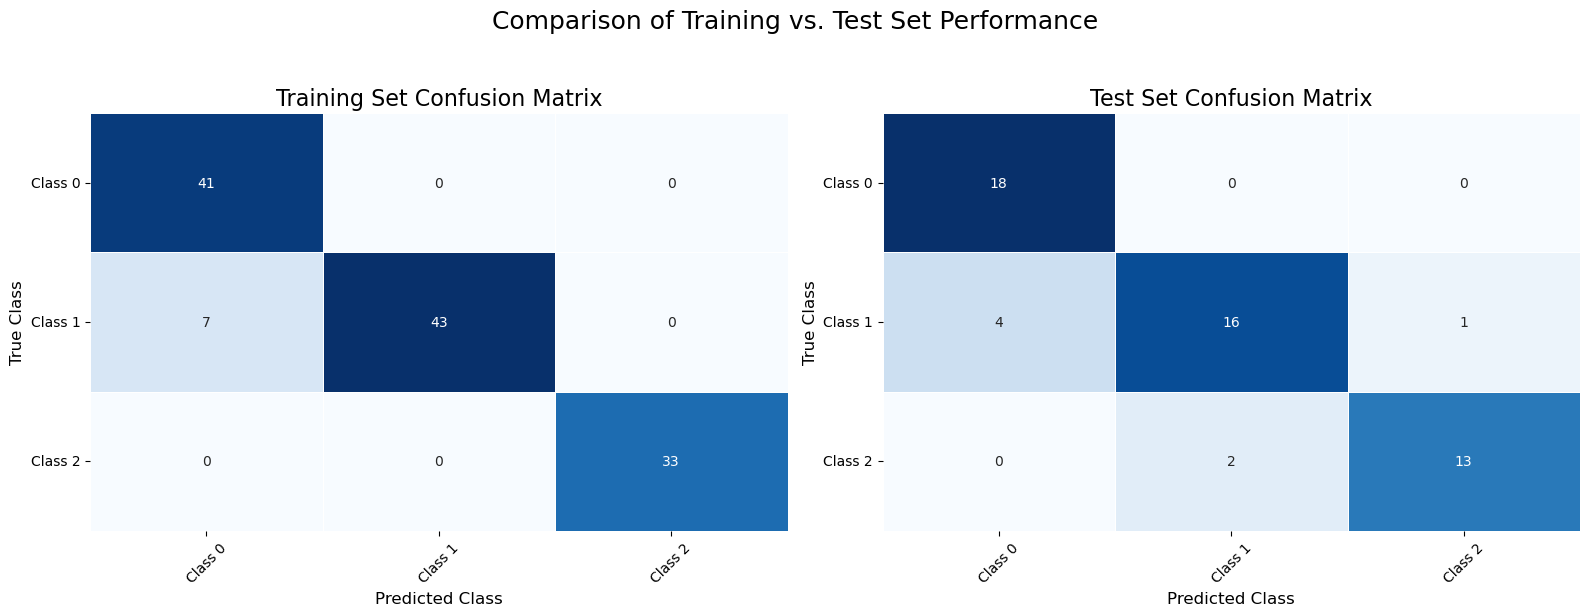

In [93]:
threshold = 0.75
y_train_pred = score(regr, X_train, y_train, threshold)[0]

y_test_pred = score(regr, X_test, y_test, threshold)[0]


cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

class_labels = [f'Class {i}' for i in [0, 1, 2]]

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

sns.heatmap(
    cm_train, 
    annot=True,              
    fmt='d',                 
    cmap='Blues',            
    cbar=False,              
    linewidths=0.5,          
    xticklabels=class_labels,
    yticklabels=class_labels,
    ax=axes[0]              
)
axes[0].set_title('Training Set Confusion Matrix', fontsize=16)
axes[0].set_ylabel('True Class', fontsize=12)
axes[0].set_xlabel('Predicted Class', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)


sns.heatmap(
    cm_test, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar=False, 
    linewidths=0.5, 
    xticklabels=class_labels,
    yticklabels=class_labels,
    ax=axes[1]               
)
axes[1].set_title('Test Set Confusion Matrix', fontsize=16)
axes[1].set_ylabel('True Class', fontsize=12)
axes[1].set_xlabel('Predicted Class', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)


plt.suptitle('Comparison of Training vs. Test Set Performance', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()